<a href="https://colab.research.google.com/github/chetansolanke14/MachineLearningHackathon/blob/master/HDFC_Hiring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import SK Learn libraries as well as panda numpy and plotting

In [0]:
#Import SK Learn libraries as well as panda numpy and plotting
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

### Load Data from local to Colab

In [0]:
from google.colab import files

In [11]:
files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [13]:
bank_train = pd.read_csv('Train.csv')
bank_test = pd.read_csv('Test.csv')
#bank_sample = pd.read_csv('Sample_submission.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
def create_csv_test(alg,filename,X_bank_test):
    #Load imputer function tohandle categorical data
    imputer = SimpleImputer(strategy='most_frequent')
    X_bank_test = imputer.fit_transform(X_bank_test)
    
    #Do feature scaling on the data
    sc= StandardScaler()
    X_bank_test_scaled = sc.fit_transform(X_bank_test)
    
    #Apply model in the testing data provided in Test.csv
    predicted_col = alg.predict(X_bank_test_scaled)
    bank_test['Col2'] =predicted_col
    new_submission = bank_test[['Col1','Col2']]
    
    #print(new_submission.head())
    new_submission.to_csv(filename, index=False)

In [0]:
def feature_scale(df,predictors):
    #print(df.shape)
    #target = df['Col2']
    X = df[predictors].astype(float)
    #print(X.shape)
    imputer = SimpleImputer(strategy='most_frequent')
    transformed_values = imputer.fit_transform(X)
    X=transformed_values
    #print(X.shape)
    sc= StandardScaler()
    X_scaled = sc.fit_transform(X)
    #print(X_scaled.shape)
    return X_scaled

In [0]:
def get_score_report(alg,X_test,y_test):
    y_predict=alg.predict(X_test)
    print(y_predict)
    print('*'*15,'Classification Report','*'*15)
    print('\n')
    print(classification_report(y_test,y_predict))
    print('*'*15,'Accuracy Score','*'*15)
    print(accuracy_score(y_test,y_predict))   
    print('*'*15,'Confussion Matrix','*'*15)
    print(confusion_matrix(y_test,y_predict))
    print('*'*15,'F1 Score','*'*15)
    print(f1_score(y_test,y_predict))

### Get Object data type columns to remove those from train data

In [42]:
tst_features=[]
for feat in bank_test.columns:
  if bank_test[feat].dtype == 'object':
    tst_features.append(feat)
    print(feat)

Col1
Col702
Col733
Col742
Col754
Col763
Col791
Col813
Col822
Col831
Col843
Col852


### Perform feature scaling on train data:

In [0]:
target = bank_train['Col2']
X = bank_train.drop(['Col747','Col836','Col2'], axis=1)
X = X.drop(tst_features,axis=1).astype(float)

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

sc= StandardScaler()
X_scaled = sc.fit_transform(X_imputed)

In [0]:
features = [xcols for xcols in X.columns if xcols != 'Col1']

#### Store the target data columns in the variable in y variable

In [0]:
y =bank_train['Col2']

### Model Training and Evalution:

#### Step 1: Split the scaled data in training and testing using train_test_split function from sklearn

#### Step 2: Create model using XGBClassifier() with default parameter 

#### Step 4: Fit/Train the model on training and testing data

#### Step 5: get the prediction values by applying model on test data as a y_pred

#### Step 6: Check the accuracy of teh data on the testing records which is around 89 %

#### Step 7: Get the important features from the default model created using xgboost and used top 20 correlated features to check on xgboost model

####  Step 8: And do the evolution and hyperparameter tuning on top if the model and check f1 score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y , test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort([feat for feat in model.feature_importances_ if feat != 0.0])[::-1][:15]
for threshs in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=threshs, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(learning_rate=0.001)
 
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
 #f1_score = f1_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (threshs, select_X_train.shape[1], accuracy*100.0))

Accuracy: 89.71%
Thresh=0.018, n=1, Accuracy: 89.50%
Thresh=0.014, n=2, Accuracy: 89.59%
Thresh=0.011, n=3, Accuracy: 89.62%
Thresh=0.011, n=4, Accuracy: 89.61%
Thresh=0.010, n=5, Accuracy: 89.57%
Thresh=0.010, n=6, Accuracy: 89.57%
Thresh=0.009, n=7, Accuracy: 89.62%
Thresh=0.008, n=8, Accuracy: 89.62%
Thresh=0.008, n=9, Accuracy: 89.64%
Thresh=0.007, n=10, Accuracy: 89.69%
Thresh=0.007, n=11, Accuracy: 89.71%
Thresh=0.007, n=12, Accuracy: 89.71%
Thresh=0.006, n=13, Accuracy: 89.71%
Thresh=0.006, n=14, Accuracy: 89.71%
Thresh=0.006, n=15, Accuracy: 89.71%


In [65]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
X_bank_test =feature_scale(bank_test,features) 
create_csv_test(model,'submission_xgboosts_09.csv', X_bank_test)

Apart from XGboost tried to solve the model using Logistic Regression,SVM, Decision Tree, Random Forest Regressor but the F1 Score got was approx 84.5 %

In [75]:
imp_predictors = []
threshold =0.0
for i,j in enumerate(selection_model.feature_importances_):
    if j > threshold:
        imp_predictors.append(i)
print(len(imp_predictors))

13


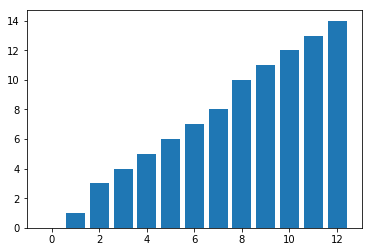

In [76]:
plt.bar(range(len(imp_predictors)), imp_predictors)
plt.show()

In [77]:
imp_predictors

[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14]

array([0.08492725, 0.09666224, 0.        , 0.06060576, 0.07056327,
       0.0507658 , 0.06030536, 0.21882036, 0.02901965, 0.        ,
       0.0861451 , 0.08686132, 0.07928851, 0.0447197 , 0.0313157 ],
      dtype=float32)